<a href="https://colab.research.google.com/github/Todah01/Summoners-War-Analysis/blob/main/sw_siege_battle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (18.7 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123105 files and dir

In [ ]:
import pandas as pd
import operator
import os
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.patches as patches

In [ ]:
plt.rc('font', family='NanumBarunGothic', size = 15)
plt.rcParams["figure.figsize"] = (14,10)

#Data Setting

In [ ]:
csv_base_name_list = ["star4_base_mon.csv", "star5_base_mon.csv", "star4_base_combi.csv", "star5_base_combi.csv"]
data = pd.read_csv(csv_name + ".csv")

siege = []
for i in range(len(data)) :
  siege.append(data.iloc[i]['리더'].split())

In [ ]:
# siege.sort(key = lambda x: int(x[3]), reverse = True)

# siege_drop_list = []

# for i in range(len(siege)):
#   cur_check_list = siege[i]
#   cur_cnt = int(cur_check_list[-1])

#   for j in range(len(siege)):
#     comp_list = siege[j]
#     comp_cnt = 0
#     if i not in siege_drop_list and j not in siege_drop_list and i != j:
#       for idx in range(len(cur_check_list) - 1):
#         if cur_check_list[idx] in comp_list:
#           comp_cnt += 1
#       if comp_cnt == 3:
#         cur_cnt += int(comp_list[-1])
#         siege_drop_list.append(j)

#   cur_check_list[-1] = str(cur_cnt)

# for idx in siege_drop_list :
#   siege[idx] = []

# while [] in siege:
#   siege.remove([])

In [ ]:
siege_dic = {}
for i in range(len(siege)) :
  for j in range(3) :
    if siege[i][j] not in siege_dic.keys() :
      siege_dic.update({siege[i][j]:int(siege[i][3])})
    else :
      siege_dic[siege[i][j]] += int(siege[i][3])

siege_data = pd.DataFrame(list(siege_dic.items()), columns = ['이름','사용횟수'])
siege_data = siege_data.sort_values('사용횟수',ascending=False)

# WFW

In [ ]:
color_list = []
for i in range(min(len(siege_data), 10)) :
  if '불' in siege_data['이름'].iloc[i] :
    color_list.append('salmon')
  elif '물' in siege_data['이름'].iloc[i] :
    color_list.append('dodgerblue')
  elif '풍' in siege_data['이름'].iloc[i] :
    color_list.append('khaki')
  elif '빛' in siege_data['이름'].iloc[i] :
    color_list.append('whitesmoke')
  elif '암' in siege_data['이름'].iloc[i] :
    color_list.append('dimgrey')

attribute = {'물': 0, '불': 0, '빛': 0, '암': 0, '풍': 0}
for i in range(len(siege_data)) :
  if '불' in siege_data['이름'].iloc[i] :
    attribute['불'] += siege_data['사용횟수'].iloc[i]
  elif '물' in siege_data['이름'].iloc[i] :
    attribute['물'] += siege_data['사용횟수'].iloc[i]
  elif '풍' in siege_data['이름'].iloc[i] :
    attribute['풍'] += siege_data['사용횟수'].iloc[i]
  elif '빛' in siege_data['이름'].iloc[i] :
    attribute['빛'] += siege_data['사용횟수'].iloc[i]
  elif '암' in siege_data['이름'].iloc[i] :
    attribute['암'] += siege_data['사용횟수'].iloc[i]

attribute_data = pd.DataFrame(list(attribute.items()), columns = ['속성','사용횟수'])
attribute_data = attribute_data.sort_values('사용횟수',ascending=False)

attribute_color = []
for i in range(5) :
  if attribute_data.iloc[i][0] == '물' :
    attribute_color.append('dodgerblue')
  elif attribute_data.iloc[i][0] == '불' :
    attribute_color.append('salmon')
  elif attribute_data.iloc[i][0] == '풍' :
    attribute_color.append('khaki')
  elif attribute_data.iloc[i][0] == '빛' :
    attribute_color.append('whitesmoke')
  elif attribute_data.iloc[i][0] == '암' :
    attribute_color.append('dimgrey')

In [ ]:
#plt.pie(attribute_data['사용횟수'], labels=attribute_data['속성'], autopct='%0.1f%%',colors=attribute_color)

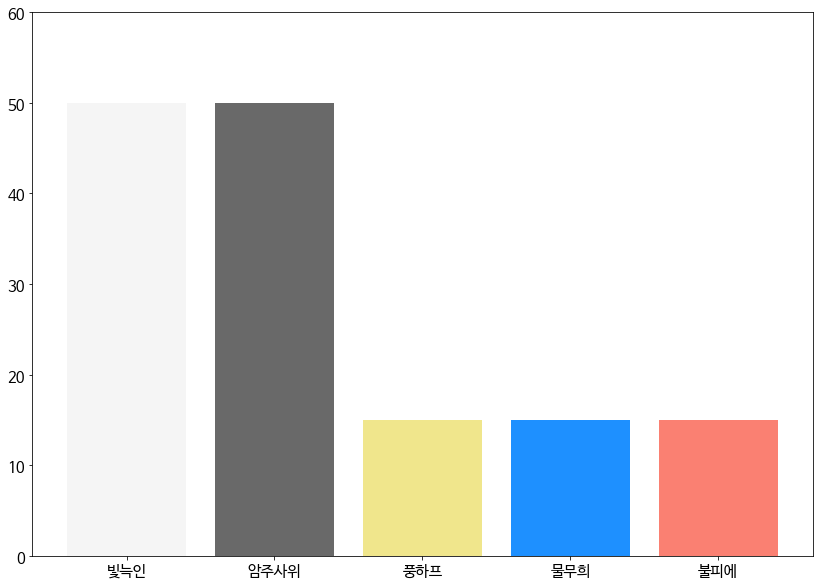

In [ ]:
wfw_len = 5
wfw_locator = 10

plt.bar(siege_data['이름'].head(wfw_len), siege_data['사용횟수'].head(wfw_len), color=color_list)
plt.ylim(0, 60)
plt.show()

In [ ]:
group_data_list = []
for name in siege_data['이름'].head(wfw_len):
  temp_index = []
  for i in range(len(siege)):
    if name in siege[i]:
      temp_index.append(i)

  temp_group_list = []
  for i in range(len(siege)):
    if i in temp_index:
      temp_group_list.append(siege[i])
  group_data_list.append(temp_group_list)

siege_dic_df_list = []
for data_list in group_data_list:
  siege_dic_most = {}
  for i in range(len(data_list)) :
    for j in range(3) :
      if data_list[i][j] not in siege_dic_most.keys() :
        siege_dic_most.update({data_list[i][j]:int(data_list[i][3])})
      else :
        siege_dic_most[data_list[i][j]] += int(data_list[i][3])

  siege_most_data = pd.DataFrame(list(siege_dic_most.items()), columns = ['이름','사용횟수'])
  siege_most_data = siege_most_data.sort_values('사용횟수',ascending = False)
  siege_dic_df_list.append(siege_most_data.iloc[1:4])

siege_data_most_list = []

for df in siege_dic_df_list:
  # temp_list = []
  temp_str = ""
  for i in range(min(len(df),3)):
    # temp_list.append(df['이름'].iloc[i])
    # temp_list.append(df['사용횟수'].iloc[i])
    temp_str += df['이름'].iloc[i]
    temp_str += " : "
    temp_str += str(df['사용횟수'].iloc[i])
    temp_str += "개\n"
  siege_data_most_list.append(temp_str)

siege.sort(key=lambda x:int(x[3]))

siege_change_by_name = []

for i in range(len(siege)):
  siege_change_by_name.append([' '.join(siege[i][:-1]), int(siege[i][-1])])

group_data = pd.DataFrame(siege_change_by_name, columns = ["defenses", "사용횟수"])

siege_data_df_list = []
for name in siege_data['이름'].head(wfw_len):
  temp_index = []
  for i in range(len(group_data)):
    if name not in group_data['defenses'].iloc[i]:
      temp_index.append(i)
  temp_group_data = group_data.drop([group_data.index[i] for i in temp_index])
  siege_data_df_list.append(temp_group_data)

siege_data_defenses_list = []
for i in range(len(siege_data_df_list)):
  temp_str = ""
  for defense, number in zip(siege_data_df_list[i]['defenses'].tail(5)[::-1], siege_data_df_list[i]['사용횟수'].tail(5)[::-1]):
    temp_str += defense
    temp_str += " : "
    temp_str += str(number)
    temp_str += "개\n"
  siege_data_defenses_list.append(temp_str)

siege_data_summary_df = siege_data.head(wfw_len)

siege_data_std_list = []
siege_data_sum = siege_data['사용횟수'].sum()
for i in range(wfw_len):
  siege_data_std_list.append(str(round((siege_data['사용횟수'].iloc[i]/siege_data_sum) * 100, 2)) + "%")

siege_data_summary_df = siege_data_summary_df.assign(점유율 = siege_data_std_list)
# siege_data_summary_df = siege_data_summary_df.assign(Used_With = siege_data_most_list)
siege_data_summary_df = siege_data_summary_df.assign(Defenses = siege_data_defenses_list)
siege_data_summary_df.to_csv(csv_name + "_Summary.txt", sep = "\t", index = False)

In [ ]:
group_data_df_list = []
for name in siege_data['이름'].head(wfw_len):
  temp_index = []
  for i in range(len(group_data)):
    if name not in group_data['defenses'].iloc[i]:
      temp_index.append(i)
  temp_group_data = group_data.drop([group_data.index[i] for i in temp_index])
  group_data_df_list.append(temp_group_data)

for i in range(len(group_data_df_list)):
  # set color
  group_data_color = color_list[i]

  # graph size
  fig_height_unit = 10 / 5;
  plt.figure(figsize=(14, min(6, fig_height_unit * len(group_data_df_list[i]))))

  group_data_top_five_name = group_data_df_list[i]['defenses'].tail(5)
  group_data_top_five_cnt = group_data_df_list[i]['사용횟수'].tail(5)

  # instantiate graph
  plt.barh(group_data_top_five_name, group_data_top_five_cnt, color = group_data_color)

  # calculate rate of monster
  group_data_percent = []
  for cnt in group_data_top_five_cnt:
    group_data_percent.append(str(round(round(cnt/group_data['사용횟수'].sum(), 5) * 100, 5)) + "%")
    # group_data_percent.append(str(cnt) + "개")

  # set text on graph
  for df_idx in range(min(len(group_data_df_list[i]), 5)):
    plt_width = group_data_df_list[i]['사용횟수'].tail(5).iloc[df_idx]
    plt.text(plt_width, group_data_top_five_name.iloc[df_idx], group_data_percent[df_idx], ha='center', va='center', size = 20)

  # modify graph
  group_ax = plt.axes()
  group_data_locator = 1 if group_data_df_list[i]['사용횟수'].max() < 5 else 5 if group_data_df_list[i]['사용횟수'].max() < 10 else wfw_locator
  group_ax.xaxis.set_major_locator(ticker.MultipleLocator(group_data_locator))
  plt.xlim(0, group_data_df_list[i]['사용횟수'].max() + group_data_df_list[i]['사용횟수'].max()/10)
  plt.gca().axes.xaxis.set_visible(False)
  plt.yticks(size = 20)
  plt.show()
  # plt.savefig(str(i) + "_" + csv_name + "_graph.png")

In [ ]:
siege_temp = sorted(siege, key=lambda x:int(x[3]), reverse = True)
siege_change = []

for i in range(len(siege_temp)) :
  siege_temp[i].insert(3, ':')
  siege_temp[i][-1] += '개'
  siege_change.append(' '.join(siege_temp[i]))

with open('sort_' + csv_name + '.txt','w',encoding='UTF-8') as f:
    for name in siege_change:
        f.write(name+'\n')

# LD

In [ ]:
siege_index = []
for i in range(len(siege_data)) :
  if '불' in siege_data['이름'].iloc[i] :
    siege_index.append(i)
  elif '물' in siege_data['이름'].iloc[i] :
    siege_index.append(i)
  elif '풍' in siege_data['이름'].iloc[i] :
    siege_index.append(i)
  elif '쿵푸' in siege_data['이름'].iloc[i]:
    siege_index.append(i)
  elif '빛요괴' in siege_data['이름'].iloc[i]:
    siege_index.append(i)
  elif '머메' in siege_data['이름'].iloc[i]:
    siege_index.append(i)
  elif '마검' in siege_data['이름'].iloc[i]:
    siege_index.append(i)
  elif '주사위' in siege_data['이름'].iloc[i]:
    siege_index.append(i)

siege_data_LD = siege_data.drop([siege_data.index[i] for i in siege_index])

In [ ]:
siege_index_LD = []
for i in range(len(siege_data)) :
  if '쿵푸' in siege_data['이름'].iloc[i]:
    continue
  elif '빛요괴' in siege_data['이름'].iloc[i]:
    continue
  elif '머메' in siege_data['이름'].iloc[i]:
    continue
  elif '마검' in siege_data['이름'].iloc[i]:
    continue
  elif '주사위' in siege_data['이름'].iloc[i]:
    continue
  elif '빛' in siege_data['이름'].iloc[i] :
    siege_index_LD.append(i)
  elif '암' in siege_data['이름'].iloc[i] :
    siege_index_LD.append(i)

siege_data_WFW = siege_data.drop([siege_data.index[i] for i in siege_index_LD])

In [ ]:
color_list_WFW = []
for i in range(10) :
  if '물' in siege_data_WFW['이름'].iloc[i] :
    color_list_WFW.append('dodgerblue')
  elif '불' in siege_data_WFW['이름'].iloc[i] :
    color_list_WFW.append('salmon')
  elif '풍' in siege_data_WFW['이름'].iloc[i] :
    color_list_WFW.append('khaki')
  elif '빛' in siege_data_WFW['이름'].iloc[i] :
    color_list_WFW.append('whitesmoke')
  elif '암' in siege_data_WFW['이름'].iloc[i] :
    color_list_WFW.append('dimgrey')

color_list_LD = []
for i in range(10) :
  if '빛' in siege_data_LD['이름'].iloc[i] :
    color_list_LD.append('whitesmoke')
  elif '암' in siege_data_LD['이름'].iloc[i] :
    color_list_LD.append('dimgrey')

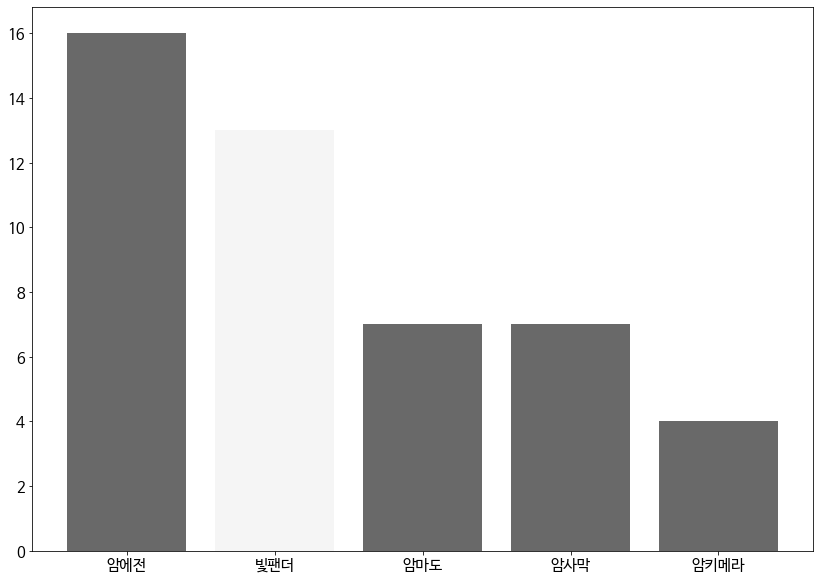

In [ ]:
ld_len = 5
ld_locator = 10
plt.bar(siege_data_LD['이름'].head(ld_len), siege_data_LD['사용횟수'].head(ld_len), color=color_list_LD)
# ax=plt.axes()
# ax.yaxis.set_major_locator(ticker.MultipleLocator(ld_locator))
plt.show()

In [ ]:
# wfw_len = 5
# wfw_locator = 5
# plt.bar(siege_data_WFW['이름'].head(wfw_len), siege_data_WFW['사용횟수'].head(wfw_len), color=color_list_WFW)
# ax=plt.axes()
# ax.yaxis.set_major_locator(ticker.MultipleLocator(wfw_locator))
# plt.show()

In [ ]:
group_data_list = []
for name in siege_data_LD['이름'].head(ld_len):
  temp_index = []
  for i in range(len(siege)):
    if name in siege[i]:
      temp_index.append(i)

  temp_group_list = []
  for i in range(len(siege)):
    if i in temp_index:
      temp_group_list.append(siege[i])
  group_data_list.append(temp_group_list)

siege_dic_df_list = []
for data_list in group_data_list:
  siege_dic_ld_most = {}
  for i in range(len(data_list)) :
    for j in range(3) :
      if data_list[i][j] not in siege_dic_ld_most.keys() :
        siege_dic_ld_most.update({data_list[i][j]:int(data_list[i][3])})
      else :
        siege_dic_ld_most[data_list[i][j]] += int(data_list[i][3])

  siege_ld_most_data = pd.DataFrame(list(siege_dic_ld_most.items()), columns = ['이름','사용횟수'])
  siege_ld_most_data = siege_ld_most_data.sort_values('사용횟수',ascending = False)
  siege_dic_df_list.append(siege_ld_most_data.iloc[1:4])

siege_data_ld_most_list = []

for df in siege_dic_df_list:
  # temp_list = []
  temp_str = ""
  for i in range(min(len(df),3)):
    # temp_list.append(df['이름'].iloc[i])
    # temp_list.append(df['사용횟수'].iloc[i])
    temp_str += df['이름'].iloc[i]
    temp_str += " : "
    temp_str += str(df['사용횟수'].iloc[i])
    temp_str += "개\n"
  siege_data_ld_most_list.append(temp_str)

siege.sort(key=lambda x:int(x[3]))

siege_change_by_name = []

for i in range(len(siege)):
  siege_change_by_name.append([' '.join(siege[i][:-1]), int(siege[i][-1])])

group_data = pd.DataFrame(siege_change_by_name, columns = ["defenses", "사용횟수"])

siege_data_df_list = []
for name in siege_data_LD['이름'].head(ld_len):
  temp_index = []
  for i in range(len(group_data)):
    if name not in group_data['defenses'].iloc[i]:
      temp_index.append(i)
  temp_group_data = group_data.drop([group_data.index[i] for i in temp_index])
  siege_data_df_list.append(temp_group_data)

siege_data_defenses_list = []
for i in range(len(siege_data_df_list)):
  temp_str = ""
  for defense, number in zip(siege_data_df_list[i]['defenses'].tail(5)[::-1], siege_data_df_list[i]['사용횟수'].tail(5)[::-1]):
    temp_str += defense
    temp_str += " : "
    temp_str += str(number)
    temp_str += "개\n"
  siege_data_defenses_list.append(temp_str)

siege_data_summary_df = siege_data_LD.head(ld_len)

siege_data_std_list = []
siege_data_sum = siege_data_LD['사용횟수'].sum()
for i in range(ld_len):
  siege_data_std_list.append(str(round((siege_data_LD['사용횟수'].iloc[i]/siege_data_sum) * 100, 2)) + "%")

siege_data_summary_df = siege_data_summary_df.assign(점유율 = siege_data_std_list)
# siege_data_summary_df = siege_data_summary_df.assign(Used_With = siege_data_ld_most_list)
siege_data_summary_df = siege_data_summary_df.assign(Defenses = siege_data_defenses_list)
siege_data_summary_df.to_csv(csv_name + "_Summary.txt", sep = "\t", index = False)

ValueError: ignored

In [ ]:
group_data_df_list = []
for name in siege_data_LD['이름'].head(ld_len):
  temp_index = []
  for i in range(len(group_data)):
    if name not in group_data['defenses'].iloc[i]:
      temp_index.append(i)
  temp_group_data = group_data.drop([group_data.index[i] for i in temp_index])
  group_data_df_list.append(temp_group_data)

for i in range(len(group_data_df_list)):
  group_data_color = color_list_LD[i]
  fig_height_unit = 10 / 5;

  plt.figure(figsize=(14, min(6, fig_height_unit * len(group_data_df_list[i]))))

  group_data_top_five_name = group_data_df_list[i]['defenses'].tail(3)
  group_data_top_five_cnt = group_data_df_list[i]['사용횟수'].tail(3)

  plt.barh(group_data_top_five_name, group_data_top_five_cnt, color = group_data_color)

  group_data_percent = []
  for cnt in group_data_top_five_cnt:
    group_data_percent.append(str(round(round(cnt/group_data['사용횟수'].sum(), 3) * 100, 3)) + "%")
    # group_data_percent.append(str(cnt) + "개")

  for df_idx in range(min(len(group_data_df_list[i]), 3)):
    plt_width = group_data_df_list[i]['사용횟수'].tail(3).iloc[df_idx]
    plt.text(plt_width, group_data_top_five_name.iloc[df_idx], group_data_percent[df_idx], ha='center', va='center', size = 20)

  group_ax = plt.axes()
  group_data_locator = 1 if group_data_df_list[i]['사용횟수'].max() < 5 else 5 if group_data_df_list[i]['사용횟수'].max() < 10 else ld_locator
  group_ax.xaxis.set_major_locator(ticker.MultipleLocator(group_data_locator))
  plt.xlim(0, group_data_df_list[i]['사용횟수'].max() + group_data_df_list[i]['사용횟수'].max()/10)
  plt.gca().axes.xaxis.set_visible(False)
  plt.yticks(size = 20)
  plt.show()

In [ ]:
siege_temp = sorted(siege, key=lambda x:int(x[3]), reverse = True)
siege_change = []

for i in range(len(siege_temp)) :
  siege_temp[i].insert(3, ':')
  siege_temp[i][-1] += '개'
  siege_change.append(' '.join(siege_temp[i]))

with open('sort_' + csv_name + '.txt','w',encoding='UTF-8') as f:
    for name in siege_change:
        f.write(name+'\n')